In [2]:
#import required libraries
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
#import train data and display dataframe
train_data = pd.read_csv("train.csv")
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#import test data and display dataframe
test_data = pd.read_csv("test.csv")
print(test_data.shape)
test_data.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#import sample data only take the first column (which has the index)
sample_data = pd.read_csv("sample_submission.csv")
new_sample = sample_data.iloc[:,1].values
print(new_sample.shape)



(28000,)


In [6]:
x_train = train_data.iloc[:,1:].values
print(x_train.ndim)
y_train = train_data['label'].values
print(y_train.shape)
x_test = test_data.iloc[:,:].values
print(x_test.shape)
x_test_show = x_test.reshape(x_test.shape[0],28,28)

2
(42000,)
(28000, 784)


In [7]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(10,activation= 'softmax'))

In [8]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [9]:
train_images = x_train.astype('float32') / 255
test_images = x_test.astype('float32') / 255

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(new_sample)
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [11]:
model.fit(train_images,y_train,epochs=5, batch_size=128)



Epoch 1/5
329/329 [==============================] - 2s 5ms/step - loss: 0.3040 - accuracy: 0.9143
Epoch 2/5
329/329 [==============================] - 2s 7ms/step - loss: 0.1279 - accuracy: 0.9635
Epoch 3/5
329/329 [==============================] - 3s 8ms/step - loss: 0.0837 - accuracy: 0.9762
Epoch 4/5
329/329 [==============================] - 2s 7ms/step - loss: 0.0576 - accuracy: 0.9837
Epoch 5/5
329/329 [==============================] - 3s 8ms/step - loss: 0.0427 - accuracy: 0.9881


In [12]:
y_pred = model.predict(test_images)
y_pred

array([[1.8606620e-08, 8.3181604e-12, 9.9999905e-01, ..., 3.5603358e-07,
        4.2225370e-08, 2.8077973e-09],
       [9.9999321e-01, 1.4016331e-07, 2.5147951e-06, ..., 1.3928911e-06,
        4.8443852e-08, 9.7048805e-09],
       [3.3494933e-07, 1.2909058e-04, 8.1571692e-05, ..., 6.1098312e-04,
        7.0450190e-03, 9.8725677e-01],
       ...,
       [3.7234573e-11, 3.4991892e-09, 1.7425609e-08, ..., 6.1898098e-10,
        1.4791786e-06, 2.7260021e-06],
       [6.2068705e-07, 3.0585319e-09, 8.2443916e-07, ..., 1.1212705e-04,
        2.5598485e-05, 9.7831982e-01],
       [2.3354520e-08, 1.3814930e-10, 9.9995053e-01, ..., 2.7752064e-08,
        3.9795611e-07, 3.5742062e-07]], dtype=float32)

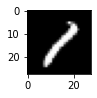

In [13]:
plt.subplot(331)
plt.imshow(x_test_show[22], cmap = plt.get_cmap('gray'))

In [14]:
y_predicted = [np.argmax(i) for i in y_pred]
y_cat = to_categorical(y_predicted)

In [15]:
y_toframe = pd.DataFrame(y_predicted)
y_tofile = pd.concat([sample_data.drop(columns='Label'),y_toframe], axis =1)
y_tofile.columns = ['ImageId', 'Label']
y_tofile


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [16]:
y_tofile.to_csv('submission.csv',index=False)